In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold

# Reading dataframes from .CSV files
# And converting dataframes from DataFrame type to numpy.ndarray type
# To delete the first index column, [:, 1:] has been added to the end
dataset_1 = pd.read_csv("train1.csv").to_numpy()[:, 1:]
dataset_2 = pd.read_csv("train2.csv").to_numpy()[:, 1:]

Above , I have imported necessary libraries and methods. After that readed the necessary train datas for homework using pandas.I have removed indexes.

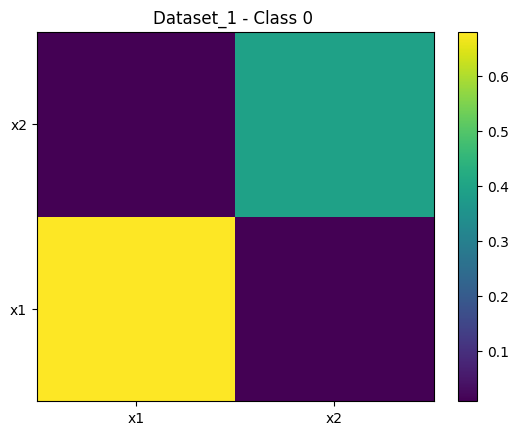

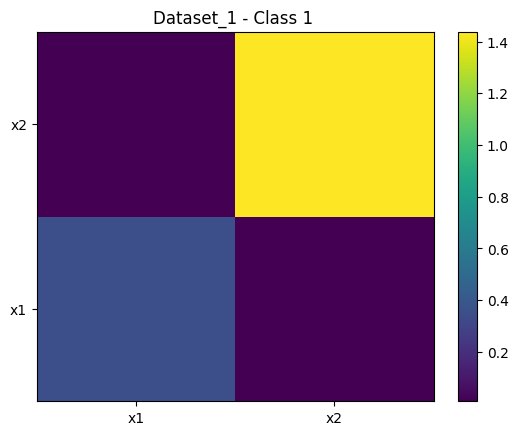

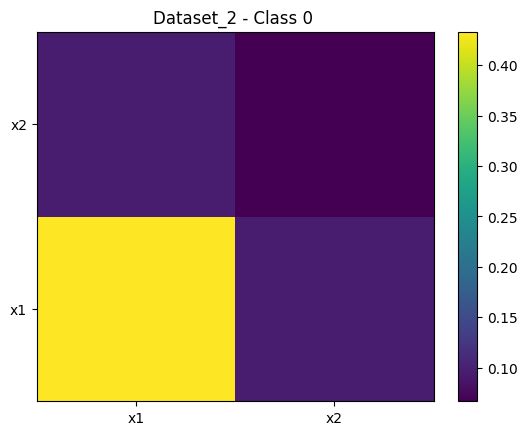

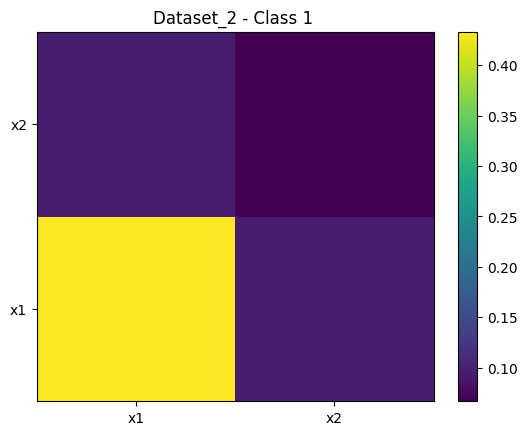

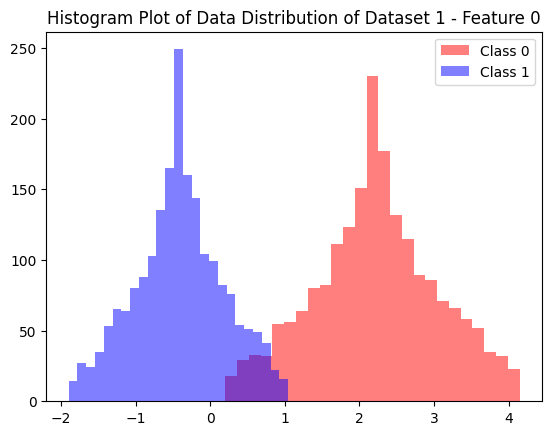

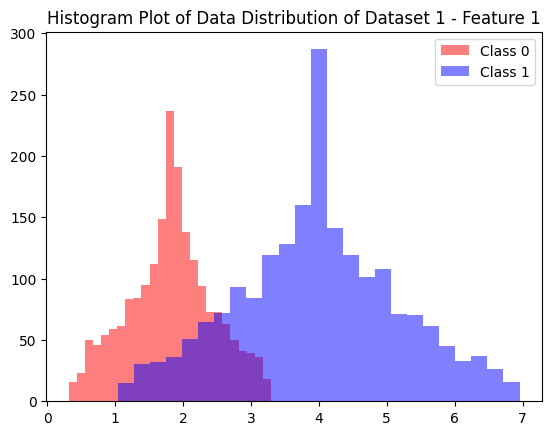

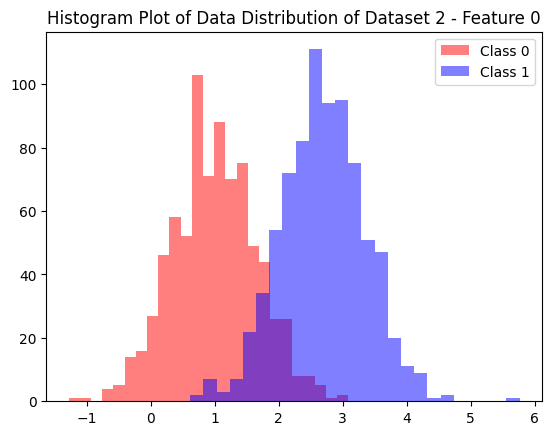

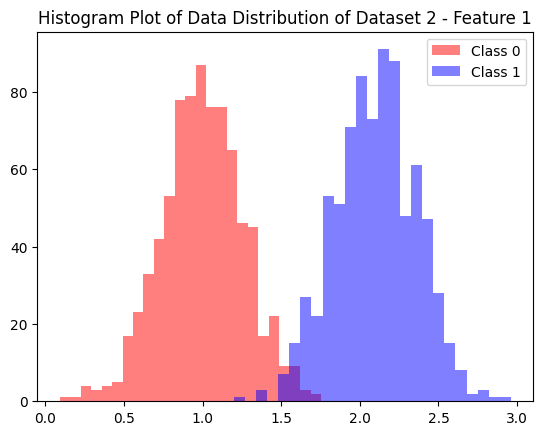

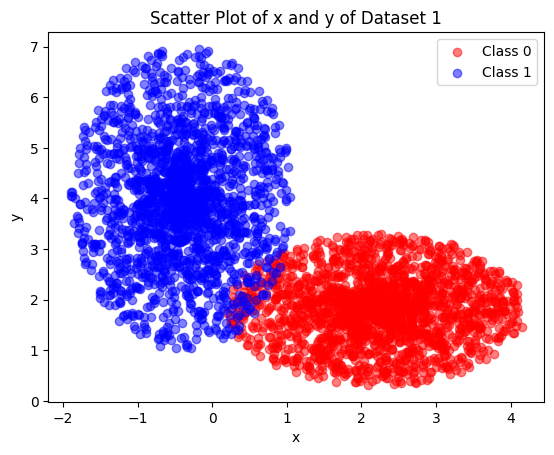

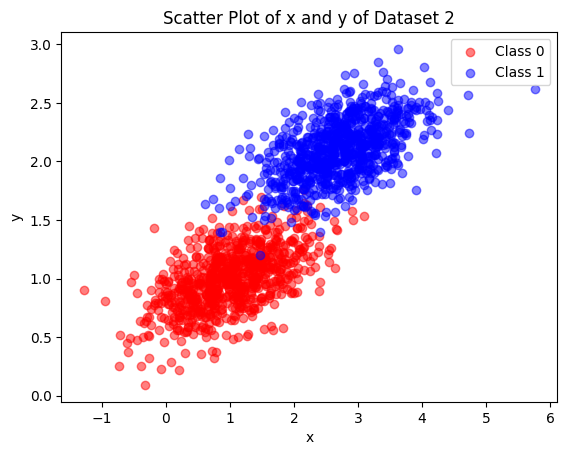

Error, Accuracy for dataset 1 (percentage):  (1.2, 98.8)
Error, Accuracy for dataset 2 (percentage):  (2.0, 98.0)
Dataset 1 class 0 --> x1 and x2:  [2.21769596 1.81682192]
Dataset 1 class 1 --> x1 and x2:  [-0.40657297  3.97311422]
Dataset 2 class 0 --> x1 and x2:  [1. 1.]
Dataset 2 class 1 --> x1 and x2:  [2.7 2.1]
Dataset 1 class 0 Covariance Matrix: [[0.680918420303089, 0.00819050247893819], [0.00819050247893819, 0.39290762374612637]]
Dataset 1 class 1 Covariance Matrix: [[0.353806727370552, 0.009072014292008023], [0.009072014292008023, 1.438109387931136]]
Dataset 2 class 0 Covariance Matrix: [[0.4332801305224785, 0.09444427436098395], [0.09444427436098395, 0.06674601238856595]]
Dataset 2 class 1 Covariance Matrix: [[0.4333332738954839, 0.09428411923799349], [0.09428411923799349, 0.06666807485328725]]


In [2]:
# Function that calculates and visualize covariance matrix
def covariance_matrix_plot(data, title, x_labels, y_labels, plot=True):
    # Calculating mean for each column
    num_cols = len(data[0])
    means = [0] * num_cols
    for i in range(num_cols):
        col_sum = 0
        for row in data:
            col_sum += float(row[i])
        means[i] = col_sum / len(data)

    # Calculating covariance matrix
    covariance_matrix = [[0] * num_cols for i in range(num_cols)]
    for i in range(num_cols):
        for j in range(num_cols):
            sum = 0
            for row in data:
                sum += (float(row[i]) - means[i]) * (float(row[j]) - means[j])
            covariance_matrix[i][j] = sum / (len(data) - 1)

    # Printing covariance matrix
    #for row in covariance_matrix:
    #   print(row)

    fig, ax = plt.subplots()
    heatmap = ax.pcolor(covariance_matrix)

    ax.set_title(title)

    ticks = [1 * i + 0.5 for i in range(len(x_labels))]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)

    fig.colorbar(heatmap)

    if plot:
        plt.show()

    return covariance_matrix


# Function that plots data distribution of features
def histogram_plot(data_class0, data_class1, dataset_name):


    plt.hist(data_class0[:, 0], bins = 25, alpha=0.5, label='Class 0', color='red')
    plt.hist(data_class1[:, 0], bins = 25, alpha=0.5, label='Class 1', color='blue')
    plt.legend(loc='upper right')
    plt.title("Histogram Plot of Data Distribution of " + dataset_name + " - Feature 0")

    # Showing plot
    plt.show()

    plt.hist(data_class0[:, 1], bins = 25, alpha=0.5, label='Class 0', color='red')
    plt.hist(data_class1[:, 1], bins = 25, alpha=0.5, label='Class 1', color='blue')
    plt.legend(loc='upper right')
    plt.title("Histogram Plot of Data Distribution of " + dataset_name + " - Feature 1")

    # Showing plot
    plt.show()


# Function that scatter plots of classes
def scatter_plot(data_class0, data_class1, dataset_name):
    # Creating scatter plot
    plt.scatter(data_class0[:, 0], data_class0[:, 1], alpha=0.5, label='Class 0', color='red')
    plt.scatter(data_class1[:, 0], data_class1[:, 1], alpha=0.5, label='Class 1', color='blue')

    # Adding labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Scatter Plot of x and y of " + dataset_name)
    plt.legend(loc='upper right')

    # Showing plot
    plt.show()


dataset1_class0 = dataset_1[dataset_1[:, 2] == 0, :2]
dataset1_class1 = dataset_1[dataset_1[:, 2] == 1, :2]

dataset2_class0 = dataset_2[dataset_2[:, 2] == 0, :2]
dataset2_class1 = dataset_2[dataset_2[:, 2] == 1, :2]

dataset1_covariance_class0 = covariance_matrix_plot(dataset1_class0, "Dataset_1 - Class 0 ", ['x1', 'x2'], ['x1', 'x2'])
dataset1_covariance_class1 = covariance_matrix_plot(dataset1_class1, "Dataset_1 - Class 1 ", ['x1', 'x2'], ['x1', 'x2'])

dataset2_covariance_class0 = covariance_matrix_plot(dataset2_class0, "Dataset_2 - Class 0 ", ['x1', 'x2'], ['x1', 'x2'])
dataset2_covariance_class1 = covariance_matrix_plot(dataset2_class1, "Dataset_2 - Class 1 ", ['x1', 'x2'], ['x1', 'x2'])

histogram_plot(dataset1_class0, dataset1_class1, "Dataset 1")
histogram_plot(dataset2_class0, dataset2_class1, "Dataset 2")

scatter_plot(dataset1_class0, dataset1_class1, "Dataset 1")
scatter_plot(dataset2_class0, dataset2_class1, "Dataset 2")


def getMean(data_class):
    num = 0.0
    
    sum_x1 = 0
    sum_x2 = 0

    for i in data_class[:,0]:
        sum_x1 = sum_x1 + i
        num = num + 1
    mean_x1 = (sum_x1/num) 

    for i in data_class[:,1]:
        sum_x2 = sum_x2 + i
    mean_x2 = (sum_x2/num)

    return np.array([mean_x1, mean_x2])

def sqr_mah_dist(x, mean, covariance):
    
    x = x - mean
    return np.transpose(x) @ np.linalg.inv(covariance) @ x

def bayes_train(cov0, cov1, mean0, mean1, c0_prob, c1_prob):
    
    if(np.array_equal(cov0, cov1)):

        g0 = lambda x: (-1/2) * sqr_mah_dist(x,mean0, cov0) + c0_prob
        g1 = lambda x: (-1/2) * sqr_mah_dist(x, mean1, cov0) + c1_prob
    
    else:
        g0 = lambda x: (-1/2) * sqr_mah_dist(x, mean0, cov0) - (1/2) * np.log(np.linalg.det(cov0)) + c0_prob
        g1 = lambda x: (-1/2) * sqr_mah_dist(x, mean1, cov1) - (1/2) * np.log(np.linalg.det(cov1)) + c1_prob
    return g0, g1


dataset1_mean0 = getMean(dataset1_class0)
dataset1_mean1 = getMean(dataset1_class1)
dataset2_mean0 = getMean(dataset2_class0)
dataset2_mean1 = getMean(dataset2_class1)

probability_dataset1_class0 = np.log(len(dataset1_class0)/len(dataset_1))
probability_dataset1_class1 = np.log(len(dataset1_class1)/len(dataset_1))
probability_dataset2_class0 = np.log(len(dataset2_class0)/len(dataset_2))
probability_dataset2_class1 = np.log(len(dataset2_class1)/len(dataset_2))

g0_dataset1, g1_dataset1 = bayes_train(dataset1_covariance_class0, dataset1_covariance_class1, dataset1_mean0,
                            dataset1_mean1,probability_dataset1_class0, probability_dataset1_class1)
g0_dataset2, g1_dataset2 = bayes_train(dataset2_covariance_class0, dataset2_covariance_class1, dataset2_mean0,
                            dataset2_mean1,probability_dataset2_class0, probability_dataset1_class1)


def bayesTest(g0, g1 ,test):

    error = 0
    accuracy = 0
    prediction = []
    var = None
    i = 0

    for row in test:

        if(g0(row[:2]) > g1(row[:2])):
            var = 0
        else:
            var = 1
        if(var != row[2]):
            prediction.append(1-row[2])
            error = error + 1

        else:
            prediction.append(row[2])
            accuracy = accuracy + 1
        i = i + 1
    error = (error/(len(test))) * 100
    accuracy = (accuracy / (len(test))) * 100
    return error, accuracy

test_1 = pd.read_csv("test1.csv").to_numpy()[:, 1:]
test_2 = pd.read_csv("test2.csv").to_numpy()[:, 1:]

print("Error, Accuracy for dataset 1 (percentage): ", bayesTest(g0_dataset1, g1_dataset1, test_1))
print("Error, Accuracy for dataset 2 (percentage): ", bayesTest(g0_dataset2, g1_dataset2, test_2))


print("Dataset 1 class 0 --> x1 and x2: ",dataset1_mean0)
print("Dataset 1 class 1 --> x1 and x2: ",dataset1_mean1)
print("Dataset 2 class 0 --> x1 and x2: ",dataset2_mean0)
print("Dataset 2 class 1 --> x1 and x2: ",dataset2_mean1)

print("Dataset 1 class 0 Covariance Matrix:",dataset1_covariance_class0)
print("Dataset 1 class 1 Covariance Matrix:",dataset1_covariance_class1)
print("Dataset 2 class 0 Covariance Matrix:",dataset2_covariance_class0)
print("Dataset 2 class 1 Covariance Matrix:",dataset2_covariance_class1)

Part A and part B has been implemented as a whole block to ease of simplicity.Outputs are ordered as  Part:A -> Heatmaps,Histograms,Scatters Part B: -> Erros and accurisies for dataset 1 and 2 , mean values for datasets classes at last Covariance Matrices for classes

Part A:For dataset 1 sigma values are different for classes.Means are seperated in their own region. Noy much shared region. They are easily seperable
Part A:For dataset 2 sigma values are same for classes.Because of this Bayes classifier must be linear.After plotting the distrubution it can be seen that class zero is left shifted version of class 1.Shit amount is probably huge because they do not share much common area.AS we can see they are easily seperable

As we can see for both classes accuracy is pretty well and error is acceptable for most of cases.

            1         2          target
0    2.684207  0.326607     Iris-setosa
1    2.715391 -0.169557     Iris-setosa
2    2.889820 -0.137346     Iris-setosa
3    2.746437 -0.311124     Iris-setosa
4    2.728593  0.333925     Iris-setosa
..        ...       ...             ...
145 -1.944017  0.187415  Iris-virginica
146 -1.525664 -0.375021  Iris-virginica
147 -1.764046  0.078519  Iris-virginica
148 -1.901629  0.115877  Iris-virginica
149 -1.389666 -0.282887  Iris-virginica

[150 rows x 3 columns]


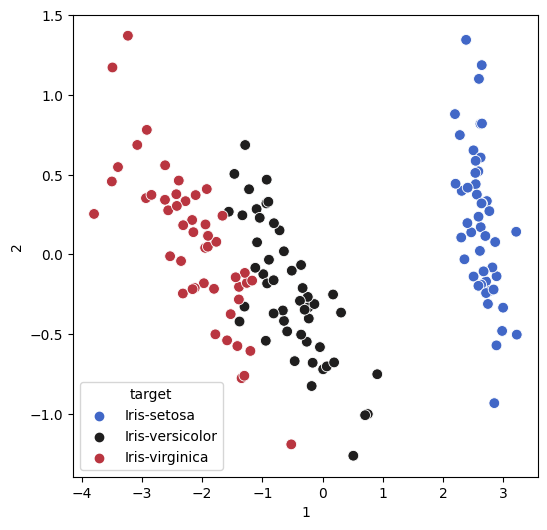

In [3]:
#Implement PART C:
import seaborn as sb


def PCA(x, k):
    x_mean = x - np.mean(x, axis=0)

    x_cov = np.cov(x_mean, rowvar = False)

    eigen_values, eigen_vectors = np.linalg.eigh(x_cov)

    index_sorted = np.argsort(eigen_values)[::-1]
    eigen_values_sorted = eigen_values[index_sorted]
    eigen_vectors_sorted = eigen_vectors[:,index_sorted]

    subset_eigen_vectors = eigen_vectors_sorted[:,0:k]

    reduced_X = np.dot(subset_eigen_vectors.transpose(), x_mean.transpose()).transpose()

    return reduced_X

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

x = data.iloc[:,0:4]

target = data.iloc[:,4]

reduced_matrix = PCA(x,2)

df = pd.DataFrame(reduced_matrix, columns = ['1','2'])
df = pd.concat([df, pd.DataFrame(target)], axis = 1)

print(df)

plt.figure(figsize = (6,6))
sb.scatterplot(data = df, x = '1', y= '2', hue = 'target', s = 60, palette = 'icefire')
plt.show()

For this part I have created (PCA) Principal Component Analysis. Principla component analysis is a popular technique for analyzing large datasets containing huge dimensions per obsarvation.Increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data (https://en.wikipedia.org/wiki/Principal_component_analysis)

PCA is basically changing the dimensions it allows us to make a better analysisi and prediction.
PCA is not a feature selection method because PCA transforms features but on the other hand feature selection just selects without transforming them.So PCA is a feature extraction method.

For example if we have a two dimensional data that joint distribution of it follows multivariate normal distribution.One of the şmportant porperities of multivariate normal distributionis that, if the correlation between features is zore.Features are orthogonal. Aim of the PCA is reduce the dimension by transforming features, It achieves by finding orthogonal principal complements. But in this case above properit is nat suitable to use if joint distribution of data  follows other distribution instead of multivariate normal distribution.
The standar PCA always finds linear principal components but sometimes we need non-linearity.

Normalization is mostly done for make all features at the same scale. If we have different features which is not suitable for comparisson but the system will not think this way and take the higher numerical value as higher priority and effect. To solve this issue we must scale/normalize it.
The PCA calculates a new projection of our dataset. Basically it is based on standard deviation of variables so, variable with higher deviation will have a higher weight.When we normalize data all variables will have nearly the same standard deviation.